In [251]:
import pandas as pd
import numpy as np
from sqlalchemy import engine

In [252]:
conn_string = r"postgresql://masterschool-analyst:pa84cc0d01e9b241460abdf838bb34f5932c9473dca571b56fcb13dd3023a62e0@ec2-52-4-84-108.compute-1.amazonaws.com:5432/da541q56oobji4"
connection = engine.create_engine(conn_string)

In [253]:
query = """select * from mat_orders"""

df = pd.read_sql(query, con=conn_string)

In [254]:
df.head()

,order_id,partner_id,partner_name,status,source,ds_organization_id,ds_budget_id,auth0_user_id,fullname,email,...,add_on_days_to_expire,capacity,booking_id,start_date,end_date,start_time,end_time,date,quantity,last_refresh
0,40af10f9-9150-4a7b-bb72-a52a031d73dd,b6bfa6e9-e780-4b7c-af83-39a63380a709,WeWork Israel,paid,WL,None,None,None,Yehoshua King,yehoshuaking@gmail.com,...,NaN,1.0,fde13c1b-50b0-4d61-acfc-51cd7e4e2662,2023-05-22,2023-05-22,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
1,e7c9c6e9-5dcd-45e4-bf8e-2ef84a5fadaa,b6bfa6e9-e780-4b7c-af83-39a63380a709,WeWork Israel,confirmed,WL,None,None,None,Yftah Peled,admin@redpanda-sw.com,...,NaN,1.0,15f18f5b-9cab-498a-aa0d-aa783ce5199a,2022-05-10,2022-05-10,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
2,aa89ca9a-6da0-433c-82b1-c9b7cad085e0,197e925e-58c4-4b26-a533-0ef8b204cef4,Urban Place,confirmed,FM,None,None,None,Anna Kozlova,vezet4vsem@gmail.com,...,NaN,1.0,6a6213ca-f93a-4897-90f5-cedddf88775d,2022-07-12,2022-07-12,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
3,2efc59b8-addc-4f58-8987-a93ab4251722,7041dd96-032c-4284-bb6f-cd48f207b956,Mindspace,confirmed,WL,None,None,None,Jake Schofield,jake.schofield@labstep.com,...,NaN,1.0,f5b0b118-f184-456e-a3a7-184243ac38ec,2021-05-13,2021-05-13,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
4,041cac62-1867-453e-a5ea-5d80a54ab149,7041dd96-032c-4284-bb6f-cd48f207b956,Mindspace,paid,WL,None,None,None,Segah Meer,segah@keetro.net,...,60.0,NaN,None,None,None,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00


In [255]:
#finding indices that have 'test' strings
filtered_indices = df[(df['company_name'].str.contains('test', case=False)) |
                                           (df['fullname'].str.contains('test', case=False)) |
                                           (df['email'].str.contains('test', case=False)) |
                                           (df['promotion_code'].str.contains('test', case=False)) |
                                           (df['partner_name'].str.contains("test", case=False))].index

#dropping 'test' strings from indices of the df
fdf = df.drop(filtered_indices)

In [256]:
fdf = fdf[fdf['source'].isin(['WL', 'FM'])]

In [257]:
fdf = fdf[fdf['status'] == 'paid']

In [258]:
fdf.head()

,order_id,partner_id,partner_name,status,source,ds_organization_id,ds_budget_id,auth0_user_id,fullname,email,...,add_on_days_to_expire,capacity,booking_id,start_date,end_date,start_time,end_time,date,quantity,last_refresh
0,40af10f9-9150-4a7b-bb72-a52a031d73dd,b6bfa6e9-e780-4b7c-af83-39a63380a709,WeWork Israel,paid,WL,None,None,None,Yehoshua King,yehoshuaking@gmail.com,...,NaN,1.0,fde13c1b-50b0-4d61-acfc-51cd7e4e2662,2023-05-22,2023-05-22,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
4,041cac62-1867-453e-a5ea-5d80a54ab149,7041dd96-032c-4284-bb6f-cd48f207b956,Mindspace,paid,WL,None,None,None,Segah Meer,segah@keetro.net,...,60.0,NaN,None,None,None,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
5,c437542e-7369-4f57-9634-d3d8c906049d,7041dd96-032c-4284-bb6f-cd48f207b956,Mindspace,paid,WL,None,None,None,Mark Bosshard,mark.bosshard1@gmail.com,...,NaN,1.0,1c23a107-65a9-453a-8367-5e7d81b6f772,2021-11-26,2021-11-26,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
9,9906ceef-5ac6-411c-ac3f-bdc88494f7fd,b6bfa6e9-e780-4b7c-af83-39a63380a709,WeWork Israel,paid,WL,None,None,None,Justin Rohloff,justin@rohloffgroup.co.za,...,90.0,NaN,None,None,None,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00
10,f2da7ed7-00cd-4d85-85b3-a5121fd28202,7041dd96-032c-4284-bb6f-cd48f207b956,Mindspace,paid,WL,None,None,None,Andrei Marcut,andrei@creativegluelab.com,...,30.0,NaN,None,None,None,None,None,None,1.0,2023-07-16 19:00:00.462593+00:00


In [259]:
fdf.describe()

,total_price,sub_total,discounted_amount,tax_amount,total_price_in_usd,processing_fee_in_usd,to_usd_rate,order_line_item_total_price,add_on_days_to_expire,capacity,quantity
count,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23479.000000,23471.000000,3036.000000,20414.000000,23471.000000
mean,199.831976,176.188104,-9.803265,23.643872,105.507135,2.829983,0.831071,184.079747,48.142292,2.947193,1.183673
std,365.413759,315.922157,71.108540,53.240421,150.088518,4.309850,0.353148,337.232528,23.862404,25.441614,0.697038
min,0.640000,0.540000,-3715.000000,0.000000,0.680000,0.000000,0.198240,0.540000,30.000000,1.000000,1.000000
25%,35.000000,32.000000,0.000000,0.000000,34.830000,1.170000,0.306849,32.000000,30.000000,1.000000,1.000000
50%,71.400000,70.000000,0.000000,5.130000,47.970000,1.610000,1.000000,70.000000,30.000000,1.000000,1.000000
75%,175.500000,150.000000,0.000000,23.000000,118.305000,3.030000,1.042690,160.000000,60.000000,1.000000,1.000000
max,9009.000000,7700.000000,0.000000,1309.000000,3125.000000,116.300000,1.405630,7700.000000,180.000000,1000.000000,20.000000


In [260]:
fdf.shape

(23479, 49)

In [134]:
fdf['created_at'].nunique()

23469

In [135]:
fdf['created_at'].count()

23469

In [136]:
# Extracting just the date from created_at as date
fdf['date'] = fdf['created_at'].dt.date

fdf['date'].count()

23469

In [137]:
fdf['date'].value_counts()

2023-06-21    100
2023-04-17     92
2023-06-12     92
2023-07-11     91
2023-07-12     91
             ... 
2021-06-12      1
2021-04-02      1
2021-12-24      1
2021-03-19      1
2021-12-25      1
Name: date, Length: 837, dtype: int64

In [138]:
fdf['date'].describe()

count          23469
unique           837
top       2023-06-21
freq             100
Name: date, dtype: object

In [139]:
fdf['partner_id'].nunique()

21

In [140]:
fdf['partner_name'].nunique()

21

In [141]:
fdf['partner_name'].count()

23469

In [142]:
fdf['order_id'].count()

23469

In [143]:
fdf.dtypes

order_id                                    object
partner_id                                  object
partner_name                                object
status                                      object
source                                      object
ds_organization_id                          object
ds_budget_id                                object
auth0_user_id                               object
fullname                                    object
email                                       object
company_name                                object
confirmation_id                             object
ds_out_of_policy_request_id                 object
space_id                                    object
space_name                                  object
created_at                          datetime64[ns]
promotion_code                              object
currency                                    object
total_price                                float64
sub_total                      

In [144]:
fdf.isnull().sum()

order_id                           0
partner_id                         0
partner_name                       0
status                             0
source                             0
ds_organization_id             23469
ds_budget_id                   23469
auth0_user_id                  23469
fullname                           0
email                              0
company_name                       0
confirmation_id                    0
ds_out_of_policy_request_id    23469
space_id                           8
space_name                         8
created_at                         0
promotion_code                 16538
currency                           0
total_price                        0
sub_total                          0
discounted_amount                  0
tax_amount                         0
total_price_in_usd                 0
processing_fee_in_usd              0
to_usd_rate                        0
location_id                        8
location_name_en                   8
l

In [145]:
fdf.describe(include='all', datetime_is_numeric=True)

,order_id,partner_id,partner_name,status,source,ds_organization_id,ds_budget_id,auth0_user_id,fullname,email,...,add_on_days_to_expire,capacity,booking_id,start_date,end_date,start_time,end_time,date,quantity,last_refresh
count,23469,23469,23469,23469,23469,0,0,0,23469,23469,...,3033.000000,20407.000000,20407,17199,17199,3208,3208,23469,23461.000000,23469
unique,23469,21,21,1,2,0,0,0,14795,14491,...,NaN,NaN,20407,766,766,37,38,837,NaN,NaN
top,c3449c1f-68cf-4676-9bdf-503975c3e1c3,7041dd96-032c-4284-bb6f-cd48f207b956,Mindspace,paid,WL,NaN,NaN,NaN,Sharon Grossman,sgrossman@augury.com,...,NaN,NaN,e6c5a60e-c7b6-4fd6-97f5-96cb5b7aa8e2,2023-07-13,2023-07-13,0900,1700,2023-06-21,NaN,NaN
freq,1,9361,9361,23469,23345,NaN,NaN,NaN,73,80,...,NaN,NaN,1,78,79,583,667,100,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.160237,2.947469,NaN,NaN,NaN,NaN,NaN,NaN,1.183752,2023-07-16 15:30:00.412761600+00:00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-07-16 15:30:00.412761+00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-07-16 15:30:00.412761088+00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-07-16 15:30:00.412761088+00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2023-07-16 15:30:00.412761088+00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,2023-07-16 15:30:00.412761+00:00


In [262]:
# number of customers as email
fdf['email'].nunique()

14494

In [263]:
fdf['company_name'].nunique()

13441

In [261]:
fdf['email'].nunique()

14494

In [264]:
# Counting the number of unique countries
fdf['country'].nunique()

7

In [265]:
# Counting the number of unique states
fdf['state'].nunique()

9

In [266]:
# Coutning the number of unique cities
fdf['city'].nunique()

41

# Exploring features to measure success

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
country_totals = pd.DataFrame(fdf.groupby('country', as_index = False)['total_price_in_usd'].sum())

In [154]:
country_totals = country_totals.sort_values(by='total_price_in_usd', ascending=False).reset_index(drop=True)

In [155]:
country_totals

,country,total_price_in_usd
0,US,983441.29
1,IL,866987.41
2,DE,361610.23
3,GB,131837.08
4,NL,65082.89
5,PL,39685.26
6,RO,25634.30


Text(0.5, 1.0, 'Country Monetary Value')

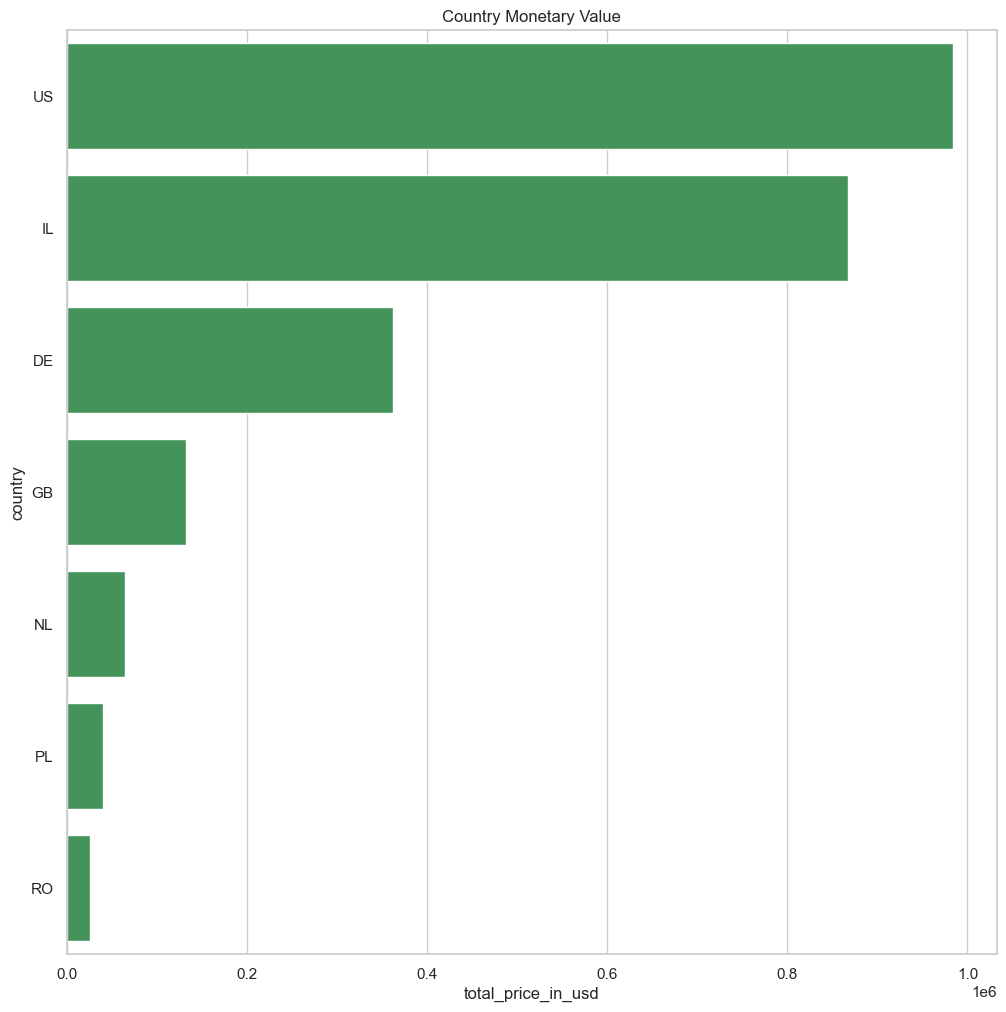

In [156]:
plt.figure(figsize = (12, 12))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_d", 1)

sns.barplot(y = country_totals['country'], x = country_totals['total_price_in_usd'], palette= pal)

plt.title('Country Monetary Value')

The US has generated the most followed closely by Israel

In [392]:
country_partner = pd.DataFrame(fdf.groupby('country', as_index = False)['partner_name'].nunique()).sort_values(by='partner_name', ascending=False).reset_index(drop=True)
                                                                                                               

In [393]:
country_partner

,country,partner_name
0,US,16
1,IL,6
2,PL,2
3,DE,1
4,GB,1
5,NL,1
6,RO,1


Text(0.5, 1.0, 'Operators in each Country')

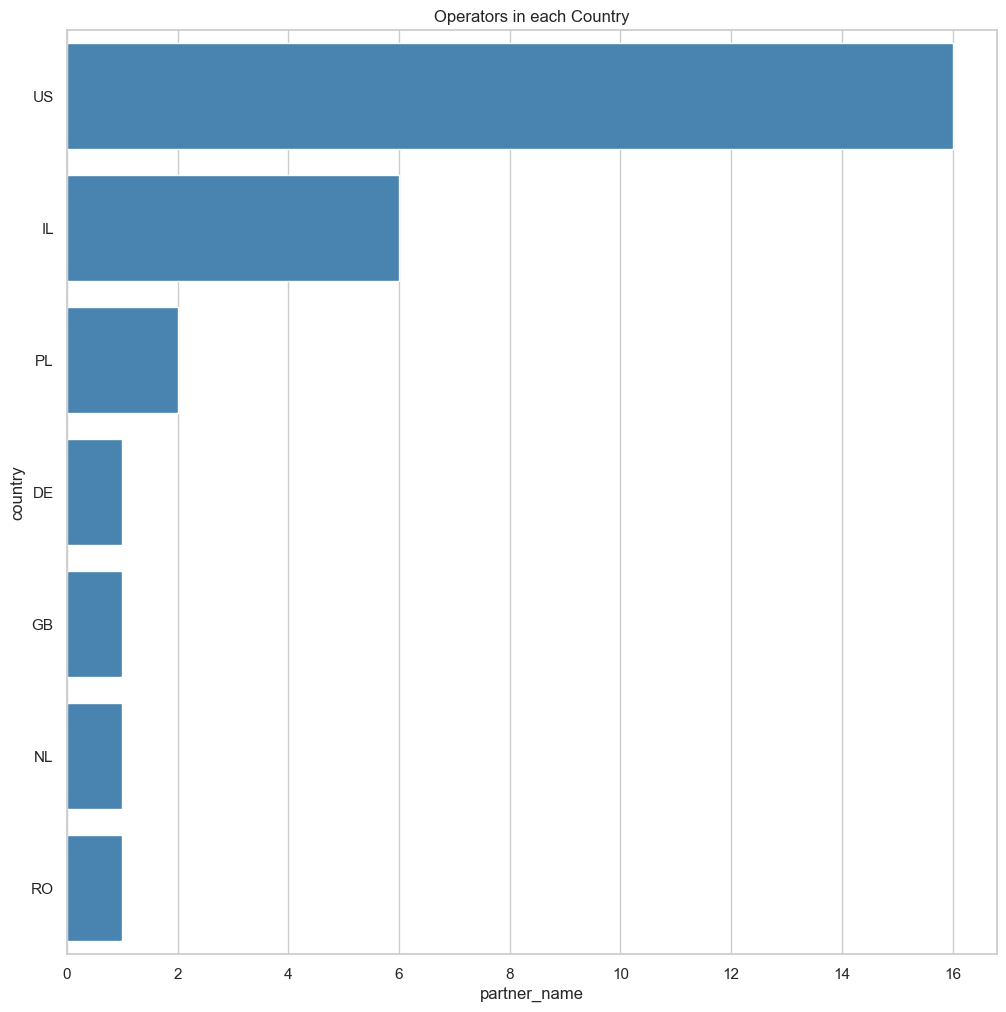

In [396]:
plt.figure(figsize = (12, 12))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_d", 1)

sns.barplot(y = country_partner['country'], x = country_partner['partner_name'], palette= pal)

plt.title('Operators in each Country')

In [157]:
# Convert 'date' to a time stamp
fdf['date'] = pd.to_datetime(fdf['date'])

# Max date
fdf['date'].max()

Timestamp('2023-07-16 00:00:00')

In [158]:
# Min date
fdf['date'].min()

Timestamp('2021-03-10 00:00:00')

In [399]:
# Group by partner_name and get the first transaction date
first_trans_date = fdf.groupby('partner_name')['date'].min()

# Convert to DataFrame and reset index
first_trans_date = pd.DataFrame(first_trans_date).reset_index()


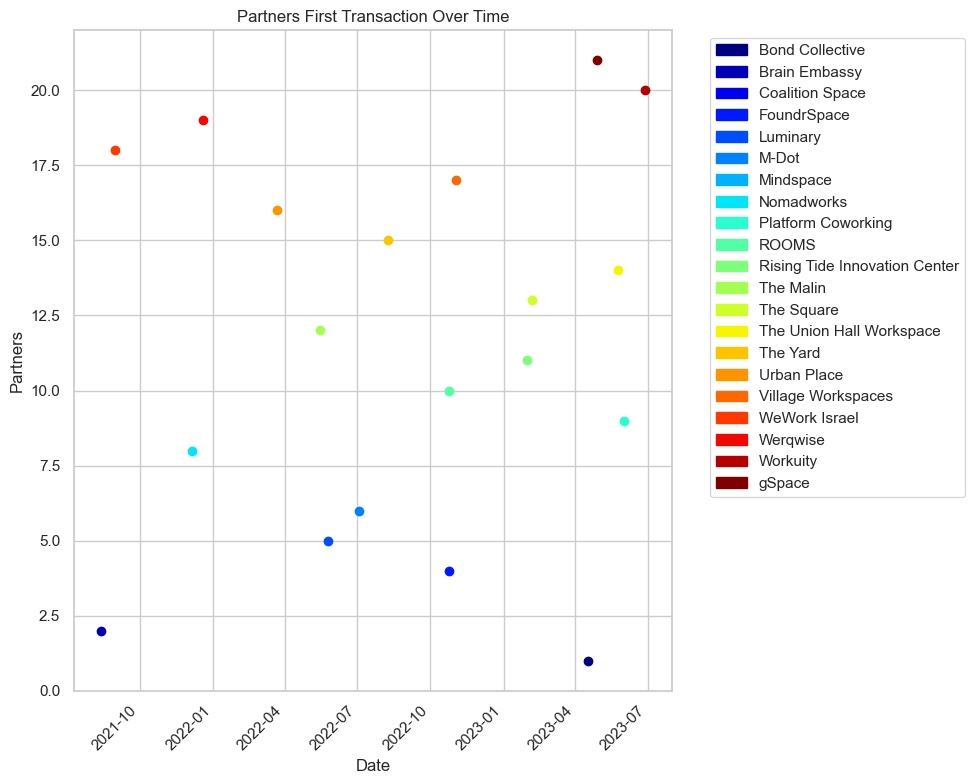

In [402]:
import matplotlib.patches as mpatches

# create a scatter plot for each partner
plt.figure(figsize=(10, 8))
for i, partner in enumerate(first_trans_date['partner_name'].unique()):
    plt.scatter(first_trans_date.loc[first_trans_date['partner_name'] == partner, 'date'], 
                first_trans_date.loc[first_trans_date['partner_name'] == partner, 'y'], 
                color = plt.cm.jet(i / 20),
                label=partner)

# create legend patches
legend_patches = [mpatches.Patch(color=plt.cm.jet(i / 20), label=partner) for i, partner in enumerate(first_trans_date['partner_name'].unique())]

# add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the chart title and axis labels
plt.title('Partners First Transaction Over Time')
plt.xlabel('Date')
plt.ylabel('Partners')

# Set the x-tick labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

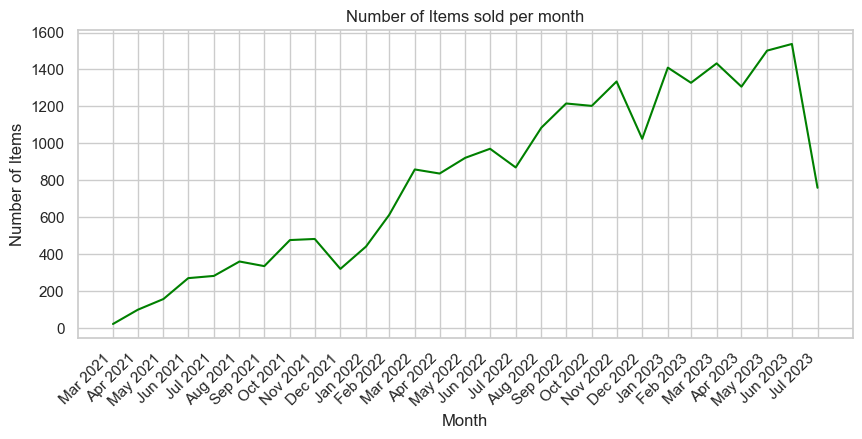

In [159]:
df_group = pd.DataFrame(fdf.resample('M', on='date')['order_id'].count())
df_group.columns = ['Number_of_items_sold']
    
plt.figure(figsize=(10, 4))
sns.lineplot(x=df_group.index, y=df_group['Number_of_items_sold'], color = 'Green')

# Set the chart title and axis labels
plt.title('Number of Items sold per month')
plt.xlabel('Month')
plt.ylabel('Number of Items')

plt.xticks(df_group.index, df_group.index.strftime('%b %Y'), rotation=45, ha='right')
plt.show()

The number of sold products has been rising steadily with the expectation of dips withiin December as seen in 2021 and 2022.

In [160]:
partner_group = pd.DataFrame(fdf.groupby(['partner_name', 'order_id', 'date'], as_index = False )['total_price_in_usd'].sum())

In [161]:
partner_group.head()

,partner_name,order_id,date,total_price_in_usd
0,Bond Collective,0146c887-e3c3-4197-9688-9e87fdd97d5e,2023-05-24,300.0
1,Bond Collective,01c51e2d-7c65-4fba-aab3-0ef0d74184fa,2023-07-12,25.0
2,Bond Collective,0293d38f-25cf-4911-8a94-c2aa1e996310,2023-05-18,1200.0
3,Bond Collective,02d95dba-e342-4257-a951-0e0999827baf,2023-07-12,50.0
4,Bond Collective,031220b2-4bc2-4b0b-a9fc-29221d0eeee0,2023-04-17,300.0


In [162]:
partner_group.shape

(23469, 4)

# RFM Analysis

An rfm analysis is a segmentation and behavioral targeting technique that will rank and categorize operators according to their recency, frequency, and monetary value of their transactions.

- The recency metric measures the time elapsed since an operator's transaction
- The frequency evaluates how frequently customers cunducted transactions with the operators
- The monetary values quantifies the amount of money spent

### Recency

In [163]:
# The last time an operater transacted 
df_recency = pd.DataFrame(fdf.groupby('partner_name', as_index=False)['date'].max())

df_recency.columns = ['partner', 'max_date']

df_recency

,partner,max_date
0,Bond Collective,2023-07-15
1,Brain Embassy,2023-07-16
2,Coalition Space,2023-05-04
3,FoundrSpace,2023-07-13
4,Luminary,2023-07-14
5,M-Dot,2023-07-04
6,Mindspace,2023-07-16
7,Nomadworks,2023-07-14
8,Platform Coworking,2023-07-12
9,ROOMS,2023-07-16


In [164]:
# Highest date 
df_recency['max_date'].max()

Timestamp('2023-07-16 00:00:00')

In [165]:
# Recency of each operator in days
df_recency['recency'] = (df_recency['max_date'].max() - df_recency['max_date']).dt.days

In [166]:
df_recency

,partner,max_date,recency
0,Bond Collective,2023-07-15,1
1,Brain Embassy,2023-07-16,0
2,Coalition Space,2023-05-04,73
3,FoundrSpace,2023-07-13,3
4,Luminary,2023-07-14,2
5,M-Dot,2023-07-04,12
6,Mindspace,2023-07-16,0
7,Nomadworks,2023-07-14,2
8,Platform Coworking,2023-07-12,4
9,ROOMS,2023-07-16,0


In [167]:
df_recency.drop('max_date', axis = 1, inplace = True)

In [170]:
partner_group.head()

,partner_name,order_id,date,total_price_in_usd
0,Bond Collective,0146c887-e3c3-4197-9688-9e87fdd97d5e,2023-05-24,300.0
1,Bond Collective,01c51e2d-7c65-4fba-aab3-0ef0d74184fa,2023-07-12,25.0
2,Bond Collective,0293d38f-25cf-4911-8a94-c2aa1e996310,2023-05-18,1200.0
3,Bond Collective,02d95dba-e342-4257-a951-0e0999827baf,2023-07-12,50.0
4,Bond Collective,031220b2-4bc2-4b0b-a9fc-29221d0eeee0,2023-04-17,300.0


### Frequency and Monetary Values 

In [172]:
df_frequency_monetary = pd.DataFrame(partner_group.groupby(['partner_name'], as_index=False).agg({'order_id':'nunique','total_price_in_usd':'sum'}))


In [173]:
df_frequency_monetary.columns =['partner', 'frequency', 'monetary']

In [174]:
rfm = df_recency.merge(df_frequency_monetary, on='partner')

In [175]:
rfm

,partner,recency,frequency,monetary
0,Bond Collective,1,458,36018.75
1,Brain Embassy,0,622,43410.50
2,Coalition Space,73,8,455.00
3,FoundrSpace,3,151,11572.50
4,Luminary,2,822,88699.75
5,M-Dot,12,102,10156.30
6,Mindspace,0,9361,754752.75
7,Nomadworks,2,950,71230.50
8,Platform Coworking,4,26,1590.00
9,ROOMS,0,292,33189.57


In [176]:
rfm.index = rfm['partner']

In [177]:
rfm.drop('partner', axis = 1, inplace = True)

In [228]:
df_frequency_monetary = fdf.groupby(['partner_name', 'email']).agg(
    frequency=('date', 'nunique'),
    monetary=('total_price_in_usd', 'sum')
).reset_index()

In [229]:
df_partner_summary = df_frequency_monetary.groupby('partner_name').agg(
    total_frequency=('frequency', 'sum'),
    total_monetary=('monetary', 'sum')
).reset_index()

In [230]:
df_partner_summary

,partner_name,total_frequency,total_monetary
0,Bond Collective,436,36018.75
1,Brain Embassy,596,43410.50
2,Coalition Space,8,455.00
3,FoundrSpace,150,11572.50
4,Luminary,744,88699.75
5,M-Dot,100,10156.30
6,Mindspace,9100,754752.75
7,Nomadworks,926,71230.50
8,Platform Coworking,26,1590.00
9,ROOMS,287,33189.57


In [232]:
df_partner_summary.index = df_partner_summary['partner_name']

df_partner_summary.drop('partner_name', axis = 1, inplace=True)

In [233]:
df_partner_summary

,total_frequency,total_monetary
partner_name,,
Bond Collective,436,36018.75
Brain Embassy,596,43410.50
Coalition Space,8,455.00
FoundrSpace,150,11572.50
Luminary,744,88699.75
M-Dot,100,10156.30
Mindspace,9100,754752.75
Nomadworks,926,71230.50
Platform Coworking,26,1590.00


### Combined DataFrame

In [178]:
rfm

,recency,frequency,monetary
partner,,,
Bond Collective,1,458,36018.75
Brain Embassy,0,622,43410.50
Coalition Space,73,8,455.00
FoundrSpace,3,151,11572.50
Luminary,2,822,88699.75
M-Dot,12,102,10156.30
Mindspace,0,9361,754752.75
Nomadworks,2,950,71230.50
Platform Coworking,4,26,1590.00


In [179]:
rfm.describe()

,recency,frequency,monetary
count,21.000000,21.000000,21.000000
mean,11.523810,1117.571429,117913.901905
std,28.172006,2214.905338,215511.201495
min,0.000000,5.000000,455.000000
25%,1.000000,26.000000,2152.500000
50%,2.000000,292.000000,33189.570000
75%,4.000000,822.000000,88699.750000
max,114.000000,9361.000000,754752.750000


### Returning customers

In [299]:
# Count number of orders for each customer and partner
df_orders = fdf.groupby(['partner_name', 'email']).size().reset_index(name='orders')

# Calculate whether the customer has returned (1 if 'orders' > 1, 0 otherwise)
df_orders['returned'] = (df_orders['orders'] > 1).astype(int)

# Now group by partner_name and calculate total customers and returning customers
df_final = df_orders.groupby('partner_name').agg(total_customers=('email', 'count'), returning_customers=('returned', 'sum')).reset_index()



In [300]:
df_final

,partner_name,total_customers,returning_customers
0,Bond Collective,356,63
1,Brain Embassy,429,106
2,Coalition Space,7,1
3,FoundrSpace,108,20
4,Luminary,456,123
5,M-Dot,63,11
6,Mindspace,5683,1456
7,Nomadworks,679,120
8,Platform Coworking,20,4
9,ROOMS,182,40


In [301]:
df_final['total_customers'].sum()

14676

In [302]:
df_final['returning_customers'].sum()

3505

In [322]:
df_final_return['return_rate'] = df_final_return['returning_customers'] / df_final_return['total_customers']


In [323]:
df_final_return

,partner_name,total_customers,returning_customers,return_rate
0,Bond Collective,356,63,0.176966
1,Brain Embassy,429,106,0.247086
2,Coalition Space,7,1,0.142857
3,FoundrSpace,108,20,0.185185
4,Luminary,456,123,0.269737
5,M-Dot,63,11,0.174603
6,Mindspace,5683,1456,0.256203
7,Nomadworks,679,120,0.176730
8,Platform Coworking,20,4,0.200000
9,ROOMS,182,40,0.219780


In [324]:
df_final_return.drop('total_customers', axis = 1, inplace = True)

In [325]:
df_final_return.drop('returning_customers', axis = 1, inplace = True)

In [327]:
df_final_return.columns = ['partner', 'return_rate']

In [330]:
rfm = rfm.merge(df_final_return, on='partner')

In [332]:
rfm.index = rfm['partner']

rfm.drop('partner', axis = 1, inplace = True)

rfm

,recency,frequency,monetary,return_rate
partner,,,,
Bond Collective,1,458,36018.75,0.176966
Brain Embassy,0,622,43410.50,0.247086
Coalition Space,73,8,455.00,0.142857
FoundrSpace,3,151,11572.50,0.185185
Luminary,2,822,88699.75,0.269737
M-Dot,12,102,10156.30,0.174603
Mindspace,0,9361,754752.75,0.256203
Nomadworks,2,950,71230.50,0.176730
Platform Coworking,4,26,1590.00,0.200000


### Operator Life Time in Days 

In [344]:
fdf['date'] = pd.to_datetime(fdf['date'])


partner_lifetimes = fdf.groupby('partner_name')['created_at'].agg(['min', 'max'])
partner_lifetimes['lifetime'] = (partner_lifetimes['max'] - partner_lifetimes['min']).dt.days

In [345]:
partner_lifetimes.drop('min', axis = 1, inplace = True)

In [346]:
partner_lifetimes.drop('max', axis = 1, inplace = True)

In [348]:
partner_lifetimes

,lifetime
partner_name,
Bond Collective,104
Brain Embassy,713
Coalition Space,126
FoundrSpace,323
Luminary,416
M-Dot,376
Mindspace,858
Nomadworks,723
Platform Coworking,42


In [350]:
partner_lifetimes = partner_lifetimes.rename_axis('partner')


In [352]:
rfm = rfm.merge(partner_lifetimes, on='partner')

In [354]:
rfm.describe()

,recency,frequency,monetary,return_rate,lifetime
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.523810,1117.571429,117913.901905,0.224732,353.333333
std,28.172006,2214.905338,215511.201495,0.063181,262.630793
min,0.000000,5.000000,455.000000,0.100000,18.000000
25%,1.000000,26.000000,2152.500000,0.185185,126.000000
50%,2.000000,292.000000,33189.570000,0.219780,323.000000
75%,4.000000,822.000000,88699.750000,0.256203,551.000000
max,114.000000,9361.000000,754752.750000,0.400000,858.000000


# Full RFM + Features Analysis

In [355]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary,return_rate,lifetime
0.25,1.0,26.0,2152.50,0.185185,126.0
0.50,2.0,292.0,33189.57,0.219780,323.0
0.75,4.0,822.0,88699.75,0.256203,551.0


In [356]:
quantiles.to_dict()

{'recency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'frequency': {0.25: 26.0, 0.5: 292.0, 0.75: 822.0},
 'monetary': {0.25: 2152.5, 0.5: 33189.57, 0.75: 88699.75},
 'return_rate': {0.25: 0.18518518518518517,
  0.5: 0.21978021978021978,
  0.75: 0.256202709836354},
 'lifetime': {0.25: 126.0, 0.5: 323.0, 0.75: 551.0}}

In [357]:
# Arguments (x = value, p = recency, monetary, frequency, return_rate, lifetime, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary, frequency, return_rate, lifetime, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [359]:
#create rfm segmentation table
rfm_segmentation = rfm
rfm_segmentation['r_quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation['f_quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['m_quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',quantiles,))
rfm_segmentation['return_quartile'] = rfm_segmentation['return_rate'].apply(FMScore, args=('return_rate',quantiles,))
rfm_segmentation['lifetime_quartile'] = rfm_segmentation['lifetime'].apply(FMScore, args=('lifetime',quantiles,))


In [360]:
rfm_segmentation

,recency,frequency,monetary,return_rate,lifetime,r_quartile,f_quartile,m_quartile,return_quartile,lifetime_quartile
partner,,,,,,,,,,
Bond Collective,1,458,36018.75,0.176966,104,4,3,3,1,1
Brain Embassy,0,622,43410.50,0.247086,713,4,3,3,3,4
Coalition Space,73,8,455.00,0.142857,126,1,1,1,1,1
FoundrSpace,3,151,11572.50,0.185185,323,2,2,2,1,2
Luminary,2,822,88699.75,0.269737,416,3,3,3,4,3
M-Dot,12,102,10156.30,0.174603,376,1,2,2,1,3
Mindspace,0,9361,754752.75,0.256203,858,4,4,4,3,4
Nomadworks,2,950,71230.50,0.176730,723,3,4,3,1,4
Platform Coworking,4,26,1590.00,0.200000,42,2,1,1,2,1


In [381]:
rfm_segmentation['RFMScore'] = rfm_segmentation.r_quartile.map(str) \
                            + rfm_segmentation.f_quartile.map(str) \
                            + rfm_segmentation.m_quartile.map(str) \
                            + rfm_segmentation.return_quartile.map(str) \
                            + rfm_segmentation.lifetime_quartile.map(str)


In [382]:
rfm_segmentation.sort_values('RFMScore', ascending=False)

,recency,frequency,monetary,return_rate,lifetime,r_quartile,f_quartile,m_quartile,return_quartile,lifetime_quartile,RFMScore
partner,,,,,,,,,,,
WeWork Israel,0,4414,683868.58,0.269695,710,4,4,4,4,4,44444
Mindspace,0,9361,754752.75,0.256203,858,4,4,4,3,4,44434
The Yard,0,3494,275517.00,0.191792,551,4,4,4,2,3,44423
Brain Embassy,0,622,43410.50,0.247086,713,4,3,3,3,4,43334
Bond Collective,1,458,36018.75,0.176966,104,4,3,3,1,1,43311
ROOMS,0,292,33189.57,0.219780,318,4,2,2,2,2,42222
The Malin,2,1403,266595.25,0.252052,434,3,4,4,3,3,34433
Nomadworks,2,950,71230.50,0.176730,723,3,4,3,1,4,34314
Werqwise,2,583,124299.50,0.208920,610,3,3,4,2,4,33424


- WeWork Israel, Mindspace, and The Yard will be closely looked at in order to inspect their behavior as to their success. 
- gSpace, The Union Hall Workspace,and Coalition Space will also be looked at closely for behavior as to why they are lacking. 
- Essentially I'll be taking a closer look at the top three and the bottom three.

The return rate doesn't seem to be a big problem between the top 3 and the bottom 3, except for Coalition Space who has the worst scores possible for all scores.

In [374]:
rfm_segmentation_reset.columns


Index(['partner', 'recency', 'frequency', 'monetary', 'return_rate',
       'lifetime', 'r_quartile', 'f_quartile', 'm_quartile', 'return_quartile',
       'lifetime_quartile', 'RFMScore'],
      dtype='object')

In [375]:
rfm_segmentation_reset = rfm_segmentation_reset.rename(columns={'Unnamed: 0': 'partner_name'})


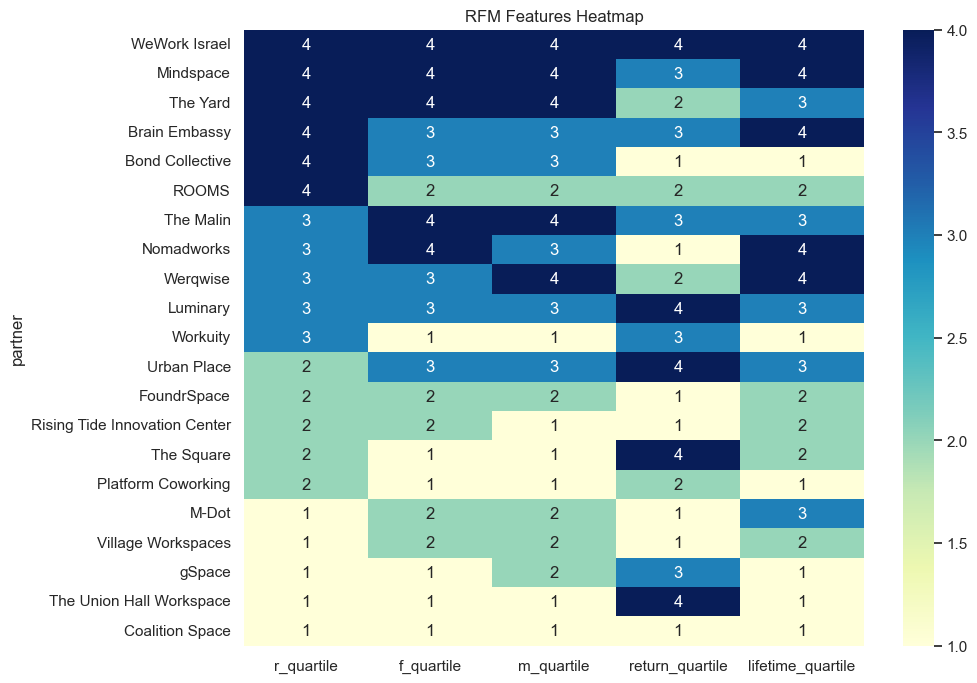

In [383]:
heatmap_data = rfm_segmentation[['r_quartile', 'f_quartile', 'm_quartile', 'return_quartile', 'lifetime_quartile']].sort_values(['r_quartile', 'f_quartile', 'm_quartile', 'return_quartile', 'lifetime_quartile'], ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('RFM Features Heatmap')
plt.show()
